In [353]:
import os
file_path= os.path.abspath("")
file_name= "car_eval.csv"
file=os.path.join(file_path,file_name)
import pandas as pd
df = pd.read_csv(file)
df['doors']=df['doors'].replace('5more', 5) #cleaning columns with ambiguos data
df['persons']=df['persons'].replace('more', 6)
df.acceptability.unique()
df.acceptability=df.acceptability.replace('good', 1) #converting into binary data.
df.acceptability=df.acceptability.replace('vgood', 1)
df.acceptability=df.acceptability.replace('acc', 1)
df.acceptability=df.acceptability.replace('unacc', 0)
df.safety= df.safety.replace(0,3)
from sklearn import preprocessing #using label encoder on ordinal data
le = preprocessing.LabelEncoder()
df.buying_price=le.fit_transform(df.buying_price)
df.maintenance=le.fit_transform(df.maintenance)
df.safety=le.fit_transform(df.safety)
df.luggage_boot=le.fit_transform(df.luggage_boot)
df.buying_price= df.buying_price.astype('category')
df.maintenance= df.maintenance.astype('category')
df.safety= df.safety.astype('category')
df.acceptability= df.acceptability.astype('category')
df.doors= df.doors.astype('int')
df.persons= df.persons.astype('int')
df.luggage_boot= df.luggage_boot.astype('category')

In [354]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.model_selection import train_test_split
X_train, X_test= train_test_split(df, test_size=0.5, random_state=42)


y_train=X_train['acceptability']
X_train=X_train.drop('acceptability', axis=1)
y_test=X_test['acceptability']
X_test=X_test.drop('acceptability', axis=1)

model=LogisticRegression(random_state=42)
model.fit(X_train,y_train)
predicted= model.predict(X_test)

from sklearn.metrics import accuracy_score
from pycm import ConfusionMatrix as cf
acc = accuracy_score(y_test, predicted)
print("Accuracy of the logistic regression is:",acc)
print()
cm = cf(actual_vector=list(y_test),predict_vector=list(predicted))
print("confusion matrix:")
print(cm)


Accuracy of the logistic regression is: 0.7245370370370371

confusion matrix:
Predict   0         1         
Actual
0         521       95        

1         143       105       





Overall Statistics : 

95% CI                                                            (0.69475,0.75433)
ACC Macro                                                         0.72454
ARI                                                               0.15699
AUNP                                                              0.63458
AUNU                                                              0.63458
Bangdiwala B                                                      0.6159
Bennett S                                                         0.44907
CBA                                                               0.60401
CSI                                                               0.2894
Chi-Squared                                                       72.00945
Chi-Squared DF                              

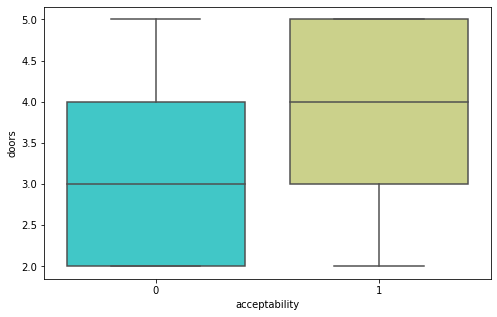

In [355]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
sns.boxplot(x='acceptability',y='doors',data=df, palette='rainbow')

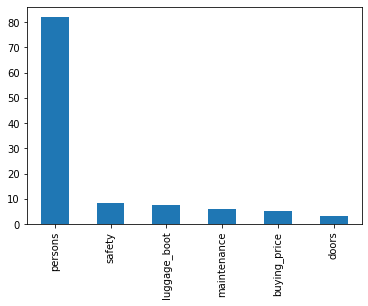

In [356]:
from sklearn.feature_selection import chi2
chi_scores= chi2(X_train, y_train)

chi_scores

chi_values= pd.Series(chi_scores[0], index= X_train.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

In [357]:
X_train, X_test= train_test_split(df, test_size=0.5, random_state=42)
y_train=X_train['acceptability']
X_train=X_train.drop('acceptability', axis=1)
y_test=X_test['acceptability']
X_test=X_test.drop('acceptability', axis=1)


from sklearn.tree import DecisionTreeClassifier #decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
pred = decision_tree.fit(X_train, y_train).predict(X_test)
acc = accuracy_score(y_test, pred)
print("Accuracy of the decision tree classifier is:",acc)
print()
cm = cf(actual_vector=list(y_test),predict_vector=list(pred))
print("confusion matrix:")
print(cm)


Accuracy of the decision tree classifier is: 0.9907407407407407

confusion matrix:
Predict   0         1         
Actual
0         609       7         

1         1         247       





Overall Statistics : 

95% CI                                                            (0.98435,0.99713)
ACC Macro                                                         0.99074
ARI                                                               0.96211
AUNP                                                              0.9923
AUNU                                                              0.9923
Bangdiwala B                                                      0.98436
Bennett S                                                         0.98148
CBA                                                               0.98054
CSI                                                               0.9777
Chi-Squared                                                       825.85893
Chi-Squared DF                         

error rate of the Random forest classifier for N= 1 is: 0.2870370370370371

error rate of the Random forest classifier for N= 2 is: 0.1597222222222222

error rate of the Random forest classifier for N= 3 is: 0.2870370370370371

error rate of the Random forest classifier for N= 4 is: 0.2870370370370371

error rate of the Random forest classifier for N= 5 is: 0.1597222222222222

error rate of the Random forest classifier for N= 6 is: 0.2870370370370371

error rate of the Random forest classifier for N= 7 is: 0.2870370370370371

error rate of the Random forest classifier for N= 8 is: 0.2870370370370371

error rate of the Random forest classifier for N= 9 is: 0.2870370370370371

error rate of the Random forest classifier for N= 10 is: 0.2870370370370371



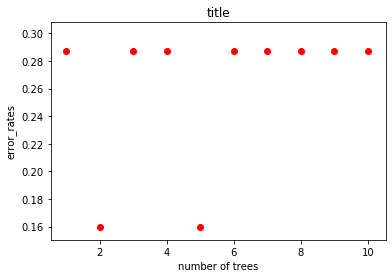

In [358]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier #random forest with depth = 1

for j in range(1,11): 
    clf = RandomForestClassifier(n_estimators= j,max_depth=1, random_state=42, criterion= "entropy")
    pred=clf.fit(X_train,y_train).predict(X_test)
    error_rate=1-accuracy_score(y_test, pred)
    print("error rate of the Random forest classifier for N=",j,"is:",error_rate)
    print()
    plt.scatter(j,error_rate, color="red")
    plt.title("title")
plt.xlabel("number of trees")
plt.ylabel("error_rates")
plt.show()


error rate of the Random forest classifier for N= 1 is: 0.28935185185185186

error rate of the Random forest classifier for N= 2 is: 0.17013888888888884

error rate of the Random forest classifier for N= 3 is: 0.16666666666666663

error rate of the Random forest classifier for N= 4 is: 0.1597222222222222

error rate of the Random forest classifier for N= 5 is: 0.1597222222222222

error rate of the Random forest classifier for N= 6 is: 0.1597222222222222

error rate of the Random forest classifier for N= 7 is: 0.1597222222222222

error rate of the Random forest classifier for N= 8 is: 0.1597222222222222

error rate of the Random forest classifier for N= 9 is: 0.1597222222222222

error rate of the Random forest classifier for N= 10 is: 0.1597222222222222



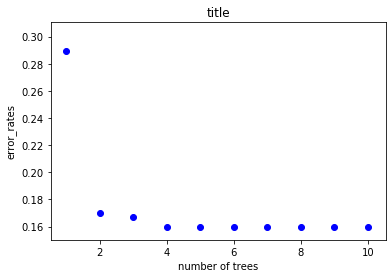

In [359]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier #random forest with depth = 2

for j in range(1,11): 
    clf = RandomForestClassifier(n_estimators= j,max_depth=2, random_state=42, criterion= "entropy")
    pred=clf.fit(X_train,y_train).predict(X_test)
    error_rate=1-accuracy_score(y_test, pred)
    print("error rate of the Random forest classifier for N=",j,"is:",error_rate)
    print()
    plt.scatter(j,error_rate, color="blue")
    plt.title("title")
plt.xlabel("number of trees")
plt.ylabel("error_rates")
plt.show()


error rate of the Random forest classifier for N= 1 is: 0.2465277777777778

error rate of the Random forest classifier for N= 2 is: 0.12384259259259256

error rate of the Random forest classifier for N= 3 is: 0.17013888888888884

error rate of the Random forest classifier for N= 4 is: 0.17013888888888884

error rate of the Random forest classifier for N= 5 is: 0.17013888888888884

error rate of the Random forest classifier for N= 6 is: 0.16319444444444442

error rate of the Random forest classifier for N= 7 is: 0.16666666666666663

error rate of the Random forest classifier for N= 8 is: 0.16319444444444442

error rate of the Random forest classifier for N= 9 is: 0.1655092592592593

error rate of the Random forest classifier for N= 10 is: 0.16087962962962965



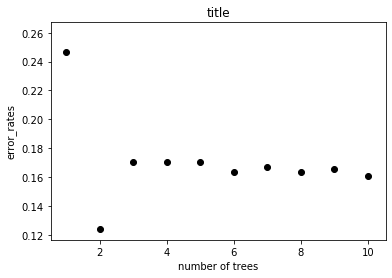

In [360]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier #random forest with depth = 3

for j in range(1,11): 
    clf = RandomForestClassifier(n_estimators= j,max_depth=3, random_state=42, criterion= "entropy")
    pred=clf.fit(X_train,y_train).predict(X_test)
    error_rate=1-accuracy_score(y_test, pred)
    print("error rate of the Random forest classifier for N=",j,"is:",error_rate)
    print()
    plt.scatter(j,error_rate, color="black")
    plt.title("title")
plt.xlabel("number of trees")
plt.ylabel("error_rates")
plt.show()


error rate of the Random forest classifier for N= 1 is: 0.25231481481481477

error rate of the Random forest classifier for N= 2 is: 0.12384259259259256

error rate of the Random forest classifier for N= 3 is: 0.09722222222222221

error rate of the Random forest classifier for N= 4 is: 0.07986111111111116

error rate of the Random forest classifier for N= 5 is: 0.06597222222222221

error rate of the Random forest classifier for N= 6 is: 0.07986111111111116

error rate of the Random forest classifier for N= 7 is: 0.0717592592592593

error rate of the Random forest classifier for N= 8 is: 0.07638888888888884

error rate of the Random forest classifier for N= 9 is: 0.07060185185185186

error rate of the Random forest classifier for N= 10 is: 0.0844907407407407



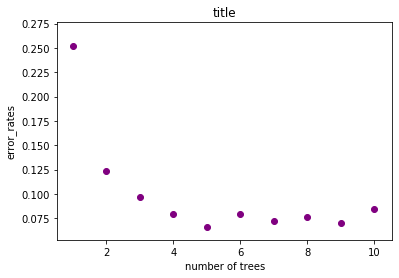

In [361]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier #random forest with depth = 4

for j in range(1,11): 
    clf = RandomForestClassifier(n_estimators= j,max_depth=4, random_state=42, criterion= "entropy")
    pred=clf.fit(X_train,y_train).predict(X_test)
    error_rate=1-accuracy_score(y_test, pred)
    print("error rate of the Random forest classifier for N=",j,"is:",error_rate)
    print()
    plt.scatter(j,error_rate, color="purple")
    plt.title("title")
plt.xlabel("number of trees")
plt.ylabel("error_rates")
plt.show()


error rate of the Random forest classifier for N= 1 is: 0.2129629629629629

error rate of the Random forest classifier for N= 2 is: 0.07638888888888884

error rate of the Random forest classifier for N= 3 is: 0.06712962962962965

error rate of the Random forest classifier for N= 4 is: 0.06944444444444442

error rate of the Random forest classifier for N= 5 is: 0.06365740740740744

error rate of the Random forest classifier for N= 6 is: 0.05555555555555558

error rate of the Random forest classifier for N= 7 is: 0.05787037037037035

error rate of the Random forest classifier for N= 8 is: 0.06828703703703709

error rate of the Random forest classifier for N= 9 is: 0.06828703703703709

error rate of the Random forest classifier for N= 10 is: 0.07407407407407407



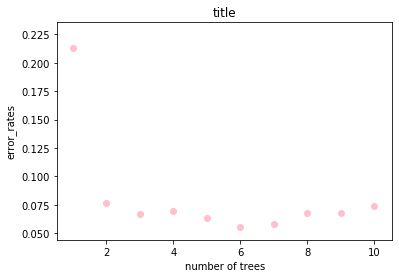

In [362]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier #random forest with depth = 5

for j in range(1,11): 
    clf = RandomForestClassifier(n_estimators= j,max_depth=5, random_state=42, criterion= "entropy")
    pred=clf.fit(X_train,y_train).predict(X_test)
    error_rate=1-accuracy_score(y_test, pred)
    print("error rate of the Random forest classifier for N=",j,"is:",error_rate)
    print()
    plt.scatter(j,error_rate, color="pink")
    plt.title("title")
plt.xlabel("number of trees")
plt.ylabel("error_rates")
plt.show()


In [363]:
clf = RandomForestClassifier(n_estimators= 10,max_depth=5, random_state=42, criterion= "entropy") #best combination of N and d for Random forest with N=9 and d=5.
pred=clf.fit(X_train,y_train).predict(X_test)
error_rate=1-accuracy_score(y_test, pred)
print("Accuracy of Random forest classifier for n=10 and d=5 is:",1-error_rate)
print()
cm = cf(actual_vector=list(y_test),predict_vector=list(pred))
print("confusion matrix:")
print(cm)


Accuracy of Random forest classifier for n=10 and d=5 is: 0.9259259259259259

confusion matrix:
Predict   0         1         
Actual
0         584       32        

1         32        216       





Overall Statistics : 

95% CI                                                            (0.90846,0.94339)
ACC Macro                                                         0.92593
ARI                                                               0.71609
AUNP                                                              0.90951
AUNU                                                              0.90951
Bangdiwala B                                                      0.87925
Bennett S                                                         0.85185
CBA                                                               0.90951
CSI                                                               0.81902
Chi-Squared                                                       579.56537
Chi-Squared DF         

In [364]:
from sklearn.naive_bayes import GaussianNB #naive bayesian
from sklearn.metrics import accuracy_score
from pycm import ConfusionMatrix as cf
gnb = GaussianNB()
pred= gnb.fit(X_train, y_train).predict(X_test)
acc = accuracy_score(y_test, pred)
print("Accuracy of the naive Bayesian classifier is:",acc)
print()
cm = cf(actual_vector=list(y_test),predict_vector=list(pred))
print("confusion matrix:")
print(cm)


Accuracy of the naive Bayesian classifier is: 0.7928240740740741

confusion matrix:
Predict   0         1         
Actual
0         554       62        

1         117       131       





Overall Statistics : 

95% CI                                                            (0.7658,0.81985)
ACC Macro                                                         0.79282
ARI                                                               0.30387
AUNP                                                              0.71379
AUNU                                                              0.71379
Bangdiwala B                                                      0.70268
Bennett S                                                         0.58565
CBA                                                               0.67693
CSI                                                               0.46598
Chi-Squared                                                       186.33476
Chi-Squared DF                      

In [365]:
from sklearn import svm
from sklearn.model_selection import train_test_split

svc = svm.SVC(kernel ='linear').fit(X_train, y_train) #linear kernal
predicted=svc.predict(X_test)
from sklearn.metrics import accuracy_score
from pycm import ConfusionMatrix as cf
acc = accuracy_score(y_test, predicted)
print("Accuracy of the linear kernel  support vector classifier is:",acc)
print()
cm = cf(actual_vector=list(y_test),predict_vector=list(predicted))
print("confusion matrix:")
print(cm)


Accuracy of the linear kernel  support vector classifier is: 0.7326388888888888

confusion matrix:
Predict   0         1         
Actual
0         529       87        

1         144       104       





Overall Statistics : 

95% CI                                                            (0.70313,0.76215)
ACC Macro                                                         0.73264
ARI                                                               0.16902
AUNP                                                              0.63906
AUNU                                                              0.63906
Bangdiwala B                                                      0.62921
Bennett S                                                         0.46528
CBA                                                               0.60269
CSI                                                               0.30433
Chi-Squared                                                       79.42651
Chi-Squared DF       

In [366]:
svc = svm.SVC(kernel ='rbf').fit(X_train, y_train) #guassian kernel
predicted=svc.predict(X_test)
acc = accuracy_score(y_test, predicted)
print("Accuracy of the Gaussian kernel support vector classifier is:",acc)
print()
cm = cf(actual_vector=list(y_test),predict_vector=list(predicted))
print("confusion matrix:")
print(cm)


Accuracy of the Gaussian kernel support vector classifier is: 0.8344907407407407

confusion matrix:
Predict   0         1         
Actual
0         555       61        

1         82        166       





Overall Statistics : 

95% CI                                                            (0.80971,0.85927)
ACC Macro                                                         0.83449
ARI                                                               0.42356
AUNP                                                              0.78516
AUNU                                                              0.78516
Bangdiwala B                                                      0.74792
Bennett S                                                         0.66898
CBA                                                               0.77031
CSI                                                               0.58644
Chi-Squared                                                       296.9146
Chi-Squared DF      

In [367]:
svc = svm.SVC(kernel ='poly', degree=3).fit(X_train, y_train)#polynomial kernel of degree 3
predicted=svc.predict(X_test)
acc = accuracy_score(y_test, predicted)
print("Accuracy of the polynimial kernel(degree 3) support vector classifier is:",acc)
print()
cm = cf(actual_vector=list(y_test),predict_vector=list(predicted))
print("confusion matrix:")
print(cm)


Accuracy of the polynimial kernel(degree 3) support vector classifier is: 0.8530092592592593

confusion matrix:
Predict   0         1         
Actual
0         575       41        

1         86        162       





Overall Statistics : 

95% CI                                                            (0.8294,0.87662)
ACC Macro                                                         0.85301
ARI                                                               0.47114
AUNP                                                              0.79333
AUNU                                                              0.79333
Bangdiwala B                                                      0.78001
Bennett S                                                         0.70602
CBA                                                               0.76156
CSI                                                               0.6273
Chi-Squared                                                       338.55755
Chi-Squar

In [369]:
df.to_csv('cleaned_car_eval.csv')